# Homework 5, problem 9.1
* Run the six-line MATLAB program of Experiment 1 to produce a plot of approximate Legendre polynomial.
* For $k = 0,1,2,3,$ plot the difference on the 257-point grid between these approximations and the exact polynomials (7.11).  How big are the errors, and how are they distributed?
* Compare these results with what you get with grid spacing $\Delta x = 2^{-\nu}$ for other values of $\nu$.  What power of $\Delta x$ appears to control the convergence?

In [1]:
# import the required libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import legendre

# set image parameters
plt.rcParams['figure.figsize'] = [16,8]
plt.rcParams['figure.dpi'] = 80

plt.rcParams['font.size'] = 15
plt.rcParams['legend.fontsize'] = 'large'
plt.rcParams['figure.titlesize'] = 'large'

## Experiment 1: Discrete Legendre Polynomials

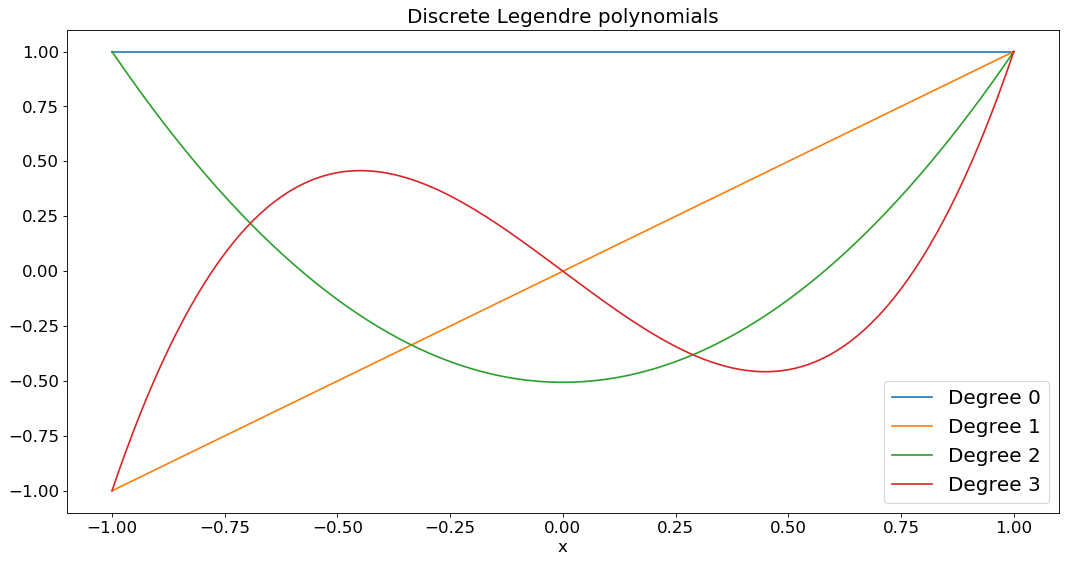

In [3]:
x = np.linspace(-1,1,256)
A = np.array([x**0 , x , x**2, x**3]).T
Q,R = np.linalg.qr(A)

scale = Q[-1,:]
Q = Q@np.diag(1/scale)
for kk in range(4):
    plt.plot(x,Q[:,kk],label='Degree %s'%(kk))
plt.legend()
plt.xlabel('x')
plt.title('Discrete Legendre polynomials')
plt.show()

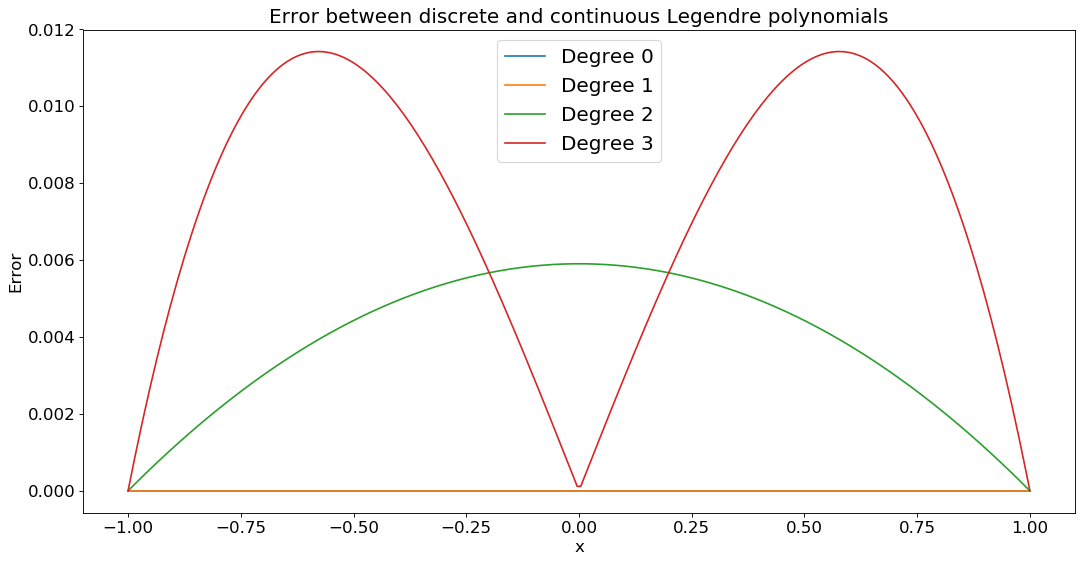

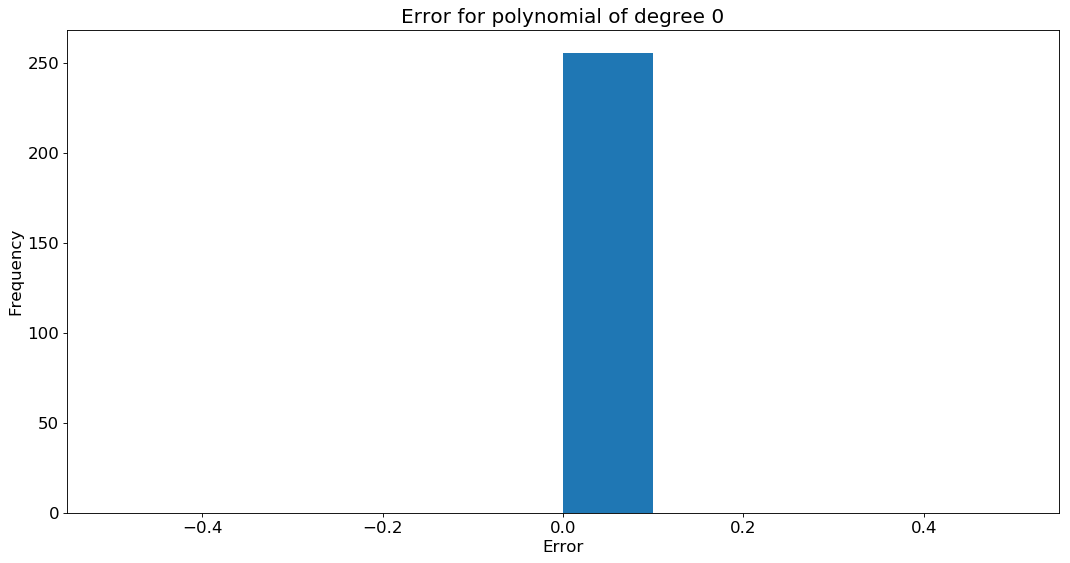

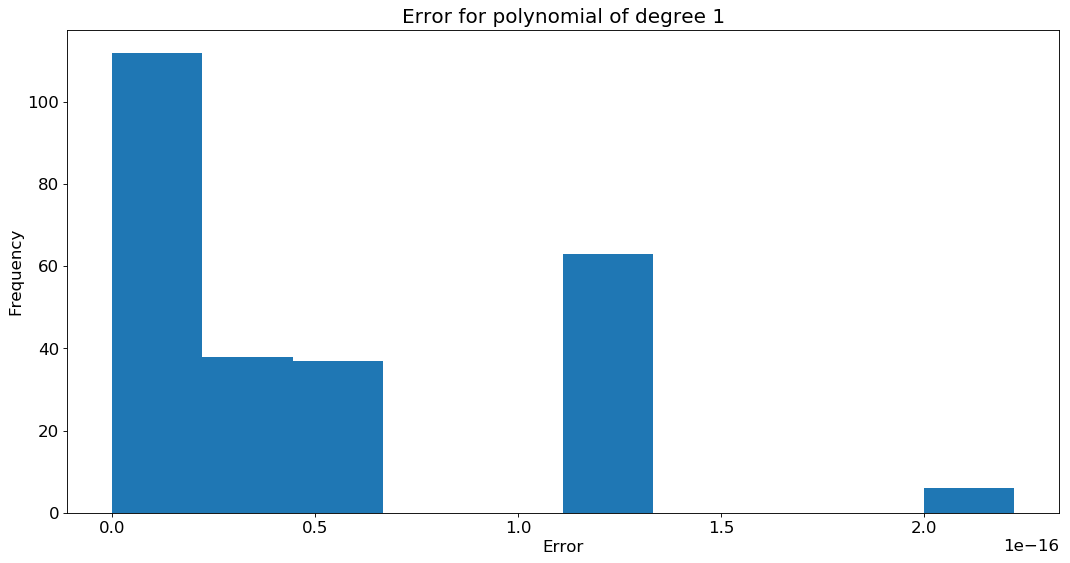

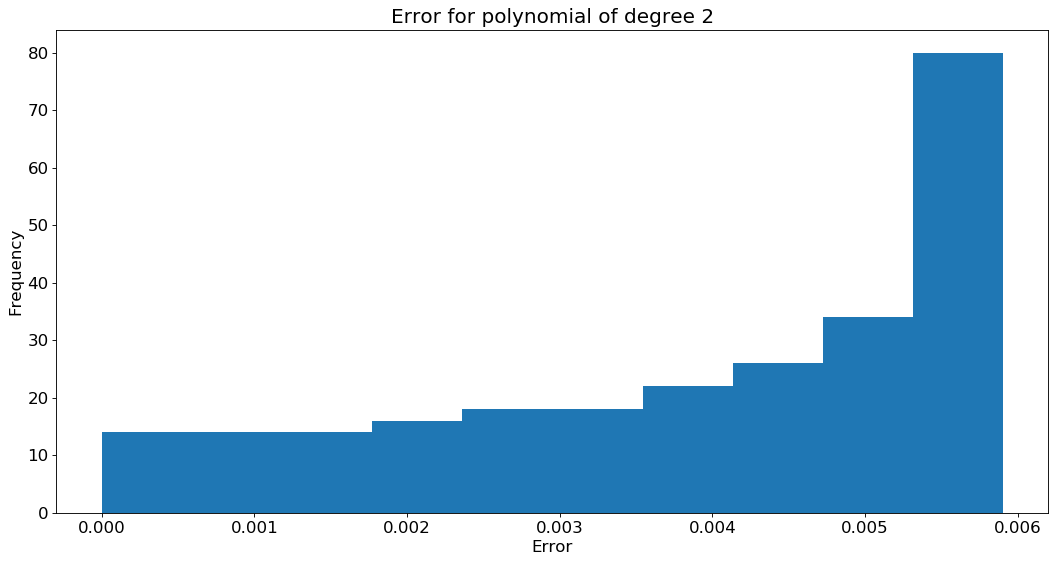

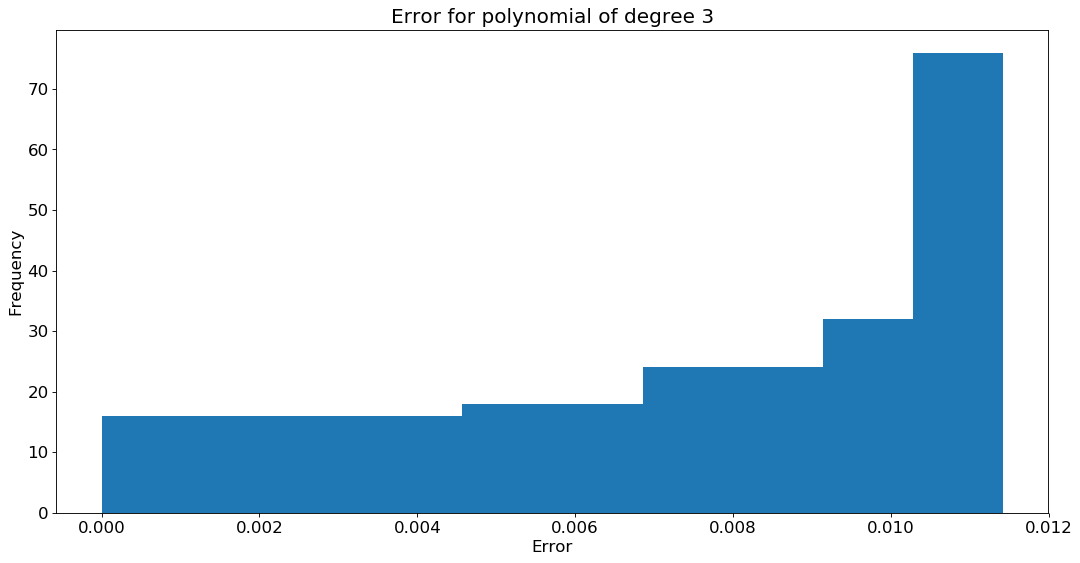

In [4]:
true_legendre = np.array([np.polyval(legendre(kk),x) for kk in range(4)]).T
error = np.abs(Q-true_legendre)
for kk in range(4):
    plt.plot(x,error[:,kk],label='Degree %s'%(kk))
plt.legend()
plt.title('Error between discrete and continuous Legendre polynomials')
plt.ylabel('Error')
plt.xlabel('x')
plt.show()

for kk in range(4):
    plt.hist(error[:,kk],label='Degree %s'%(kk))
    plt.xlabel('Error')
    plt.ylabel('Frequency')
    plt.title('Error for polynomial of degree %s'%(kk))
    plt.show()


$\Delta x = 2^{-8}$


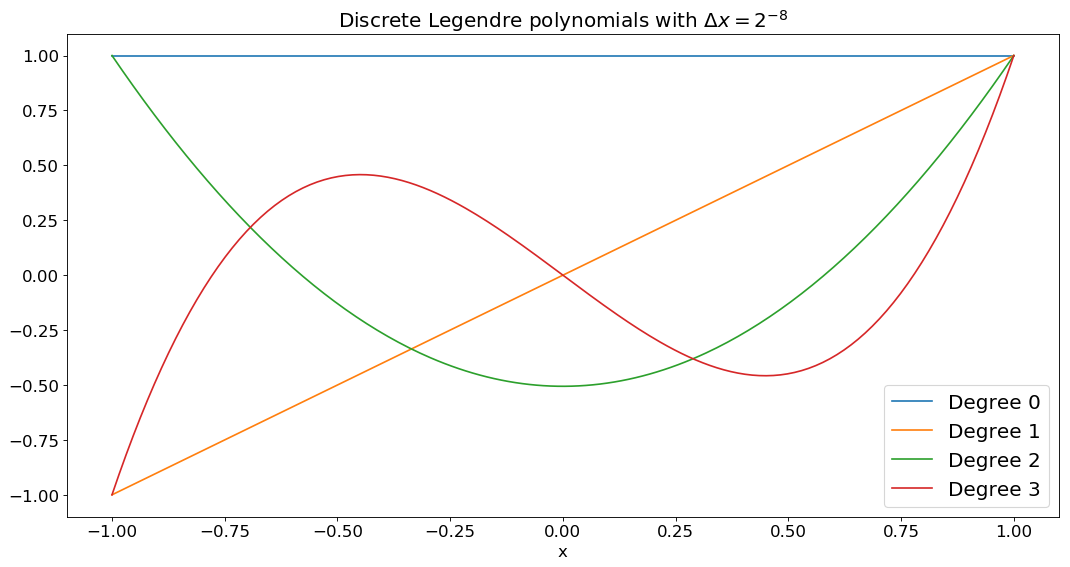

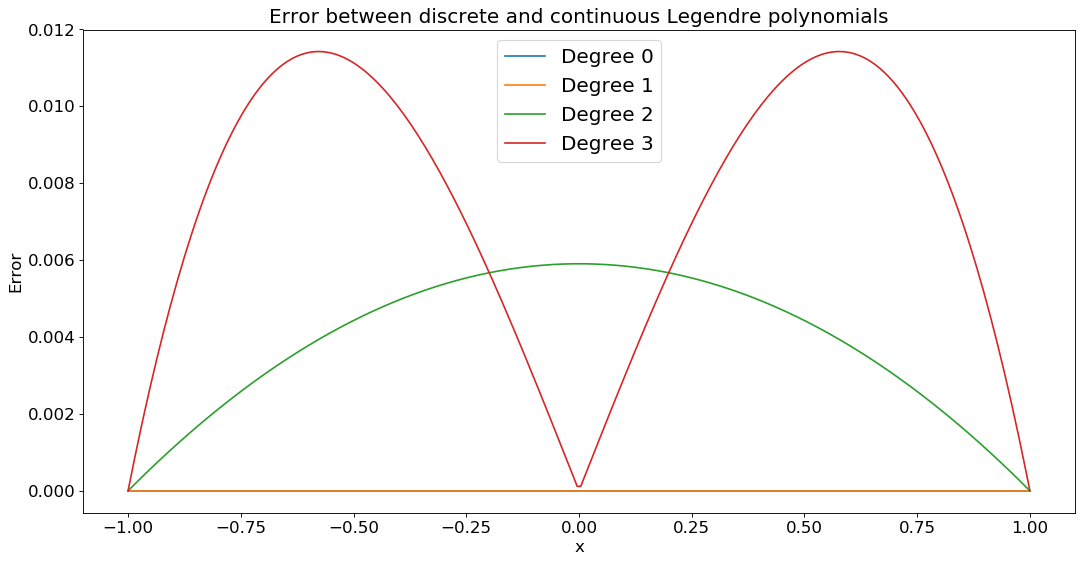

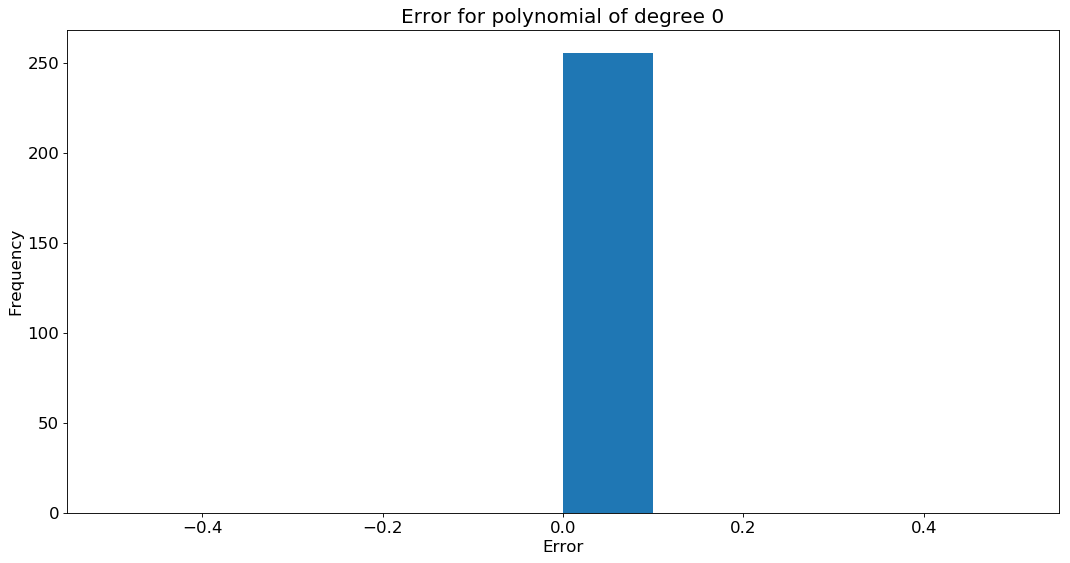

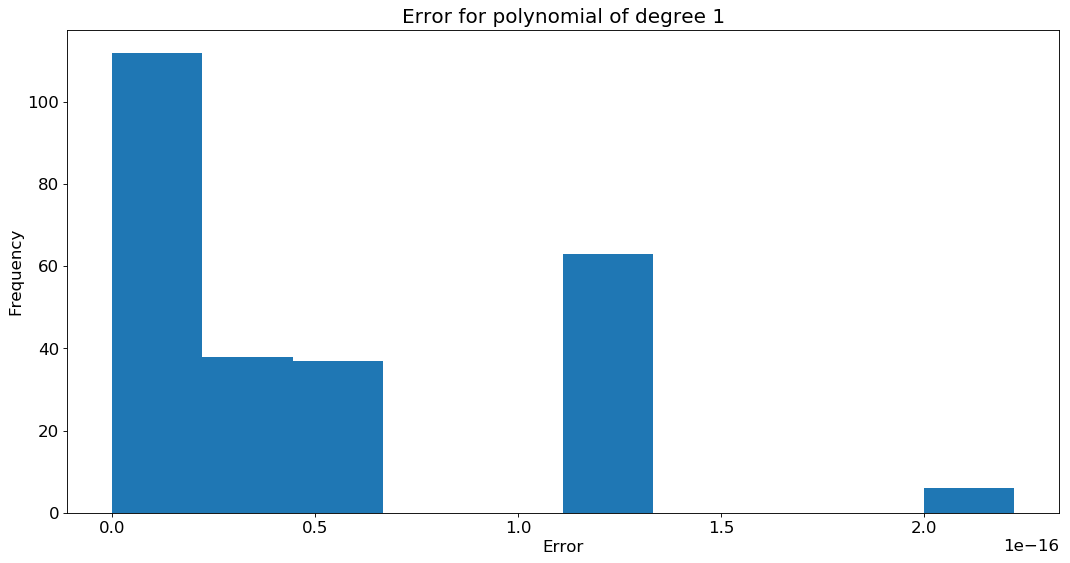

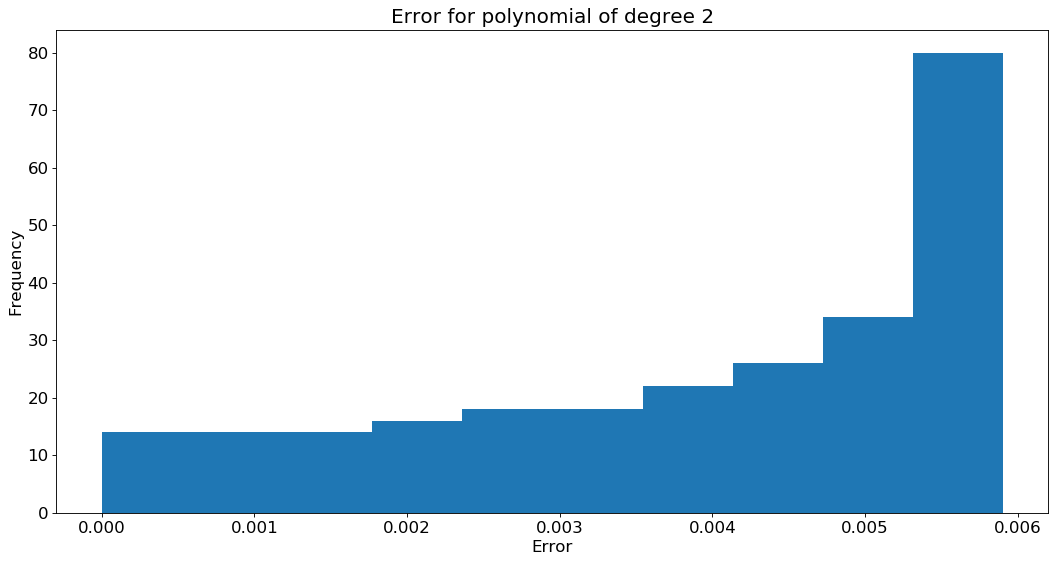

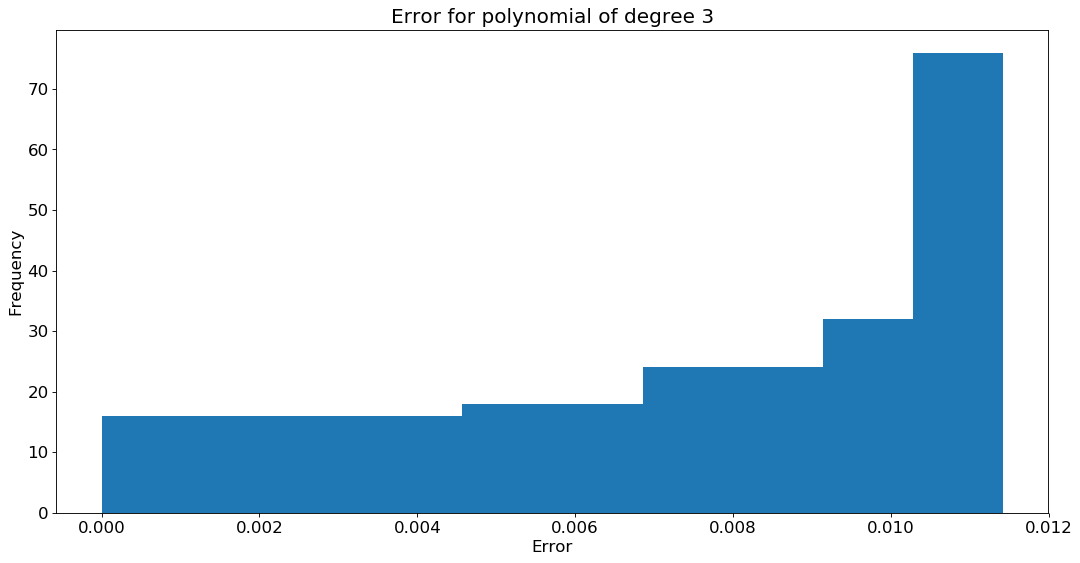


$\Delta x = 2^{-9}$


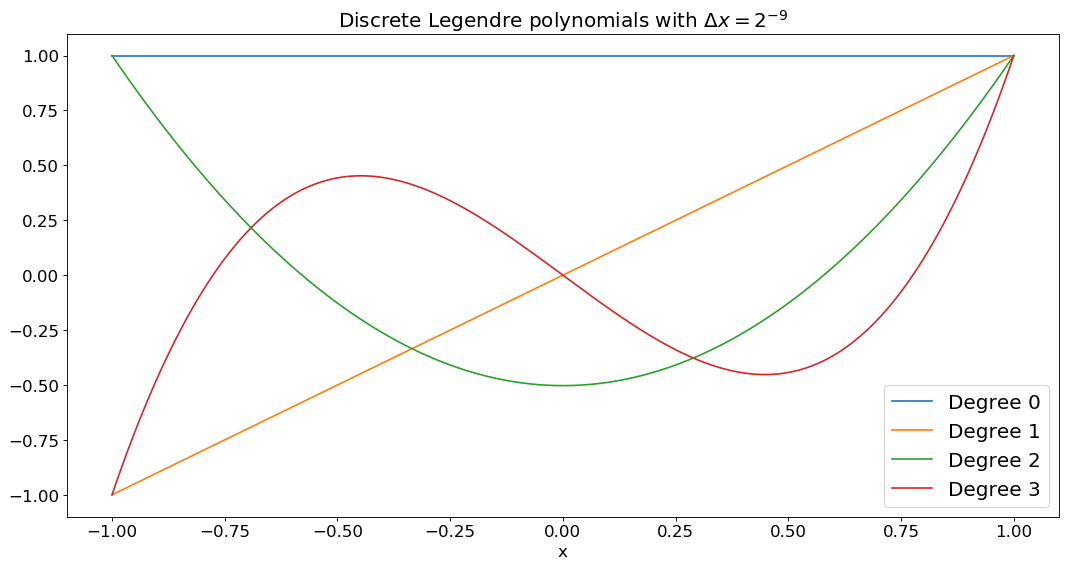

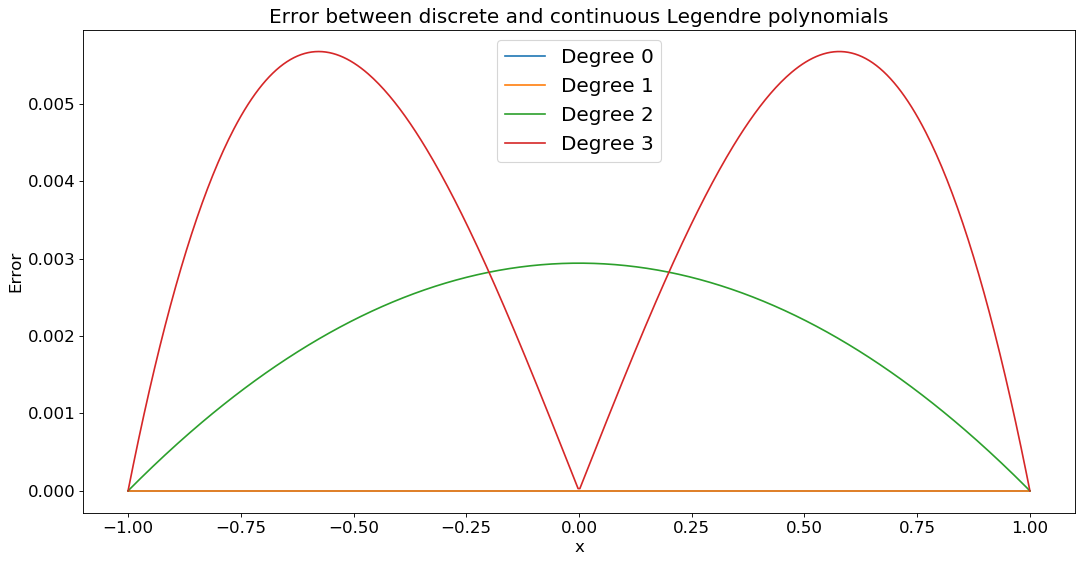

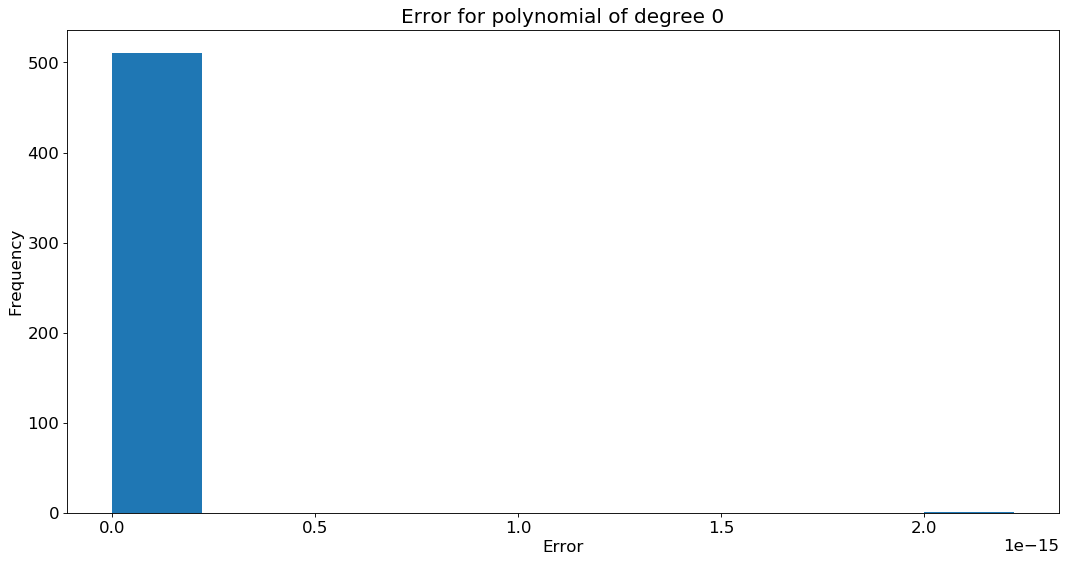

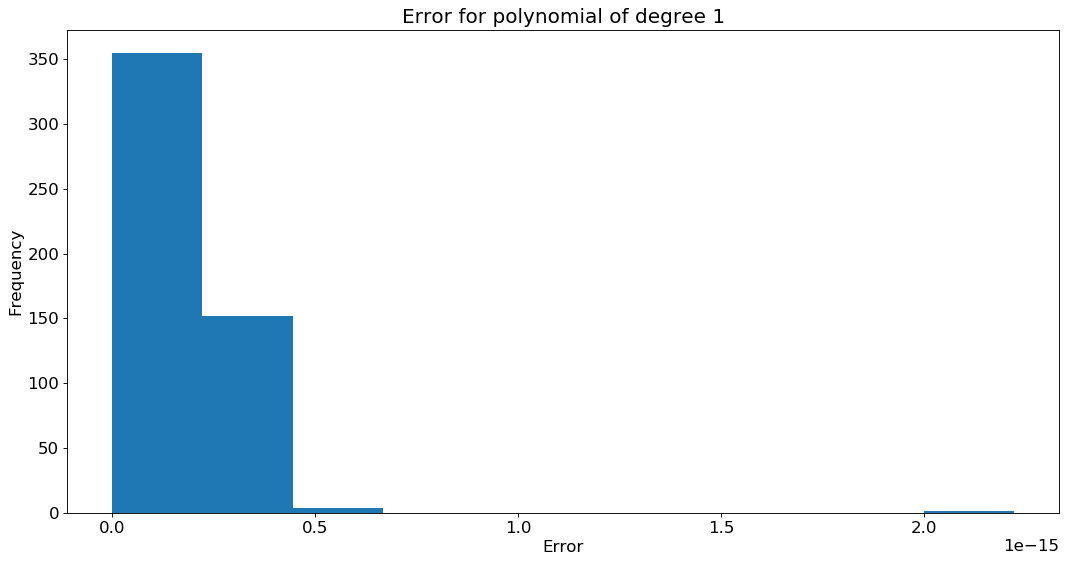

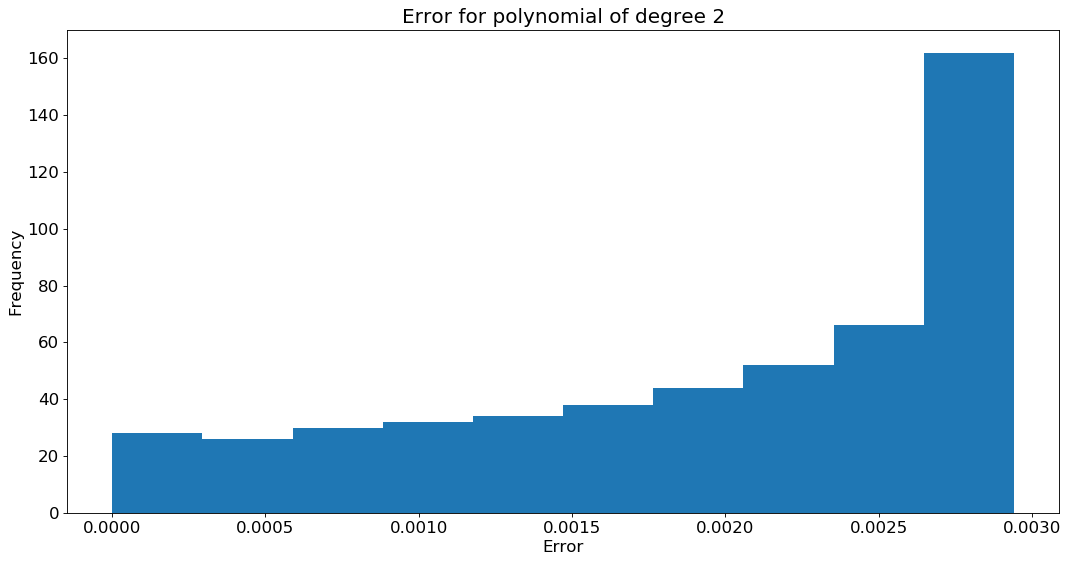

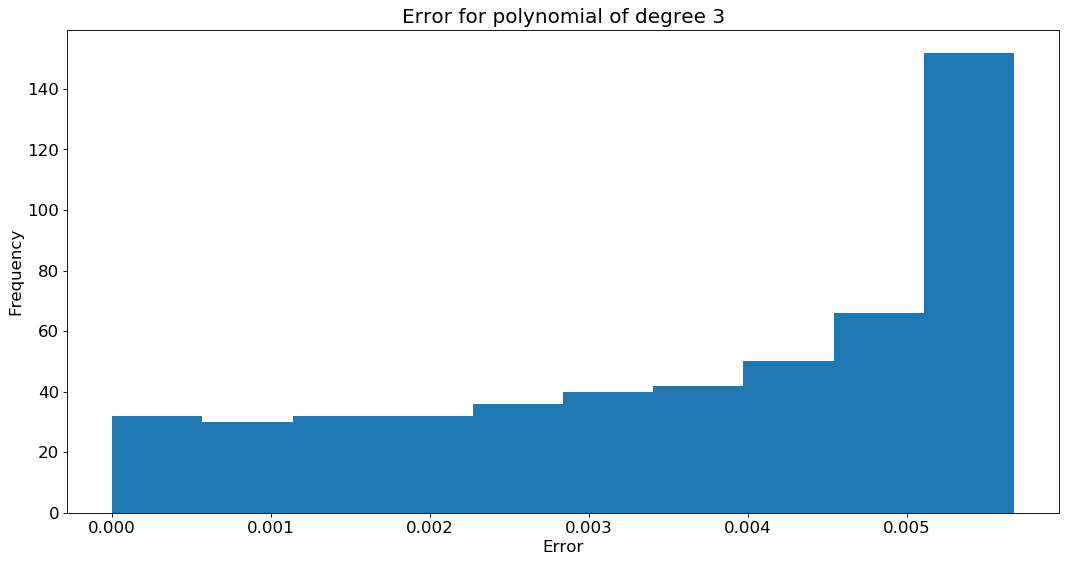


$\Delta x = 2^{-10}$


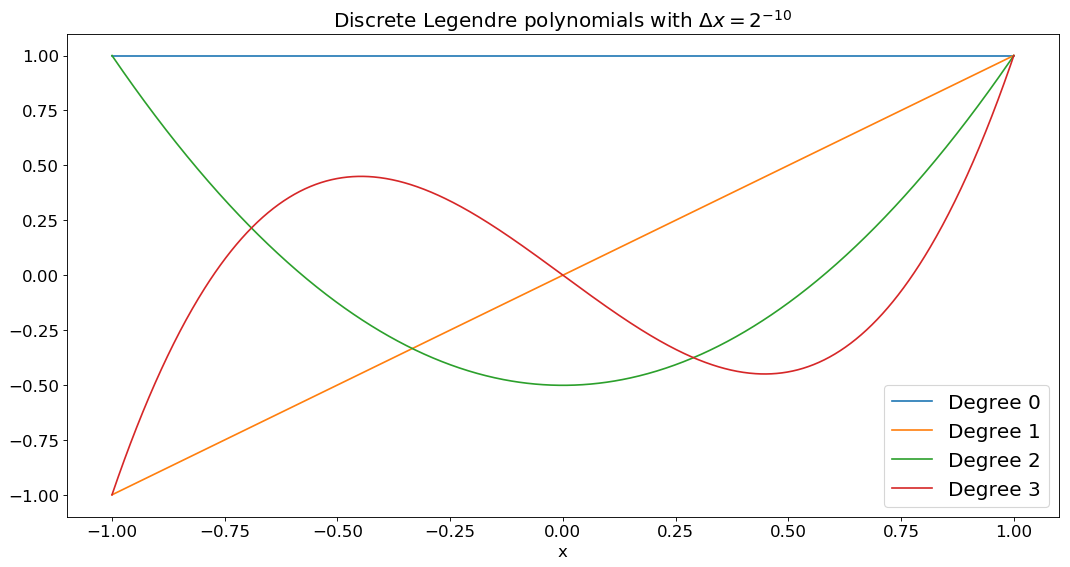

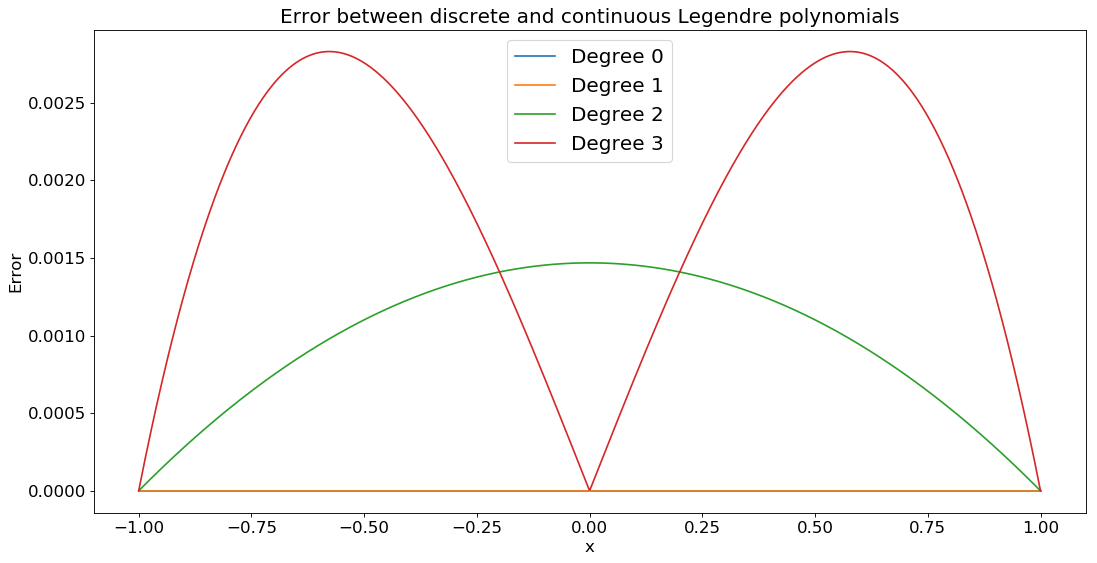

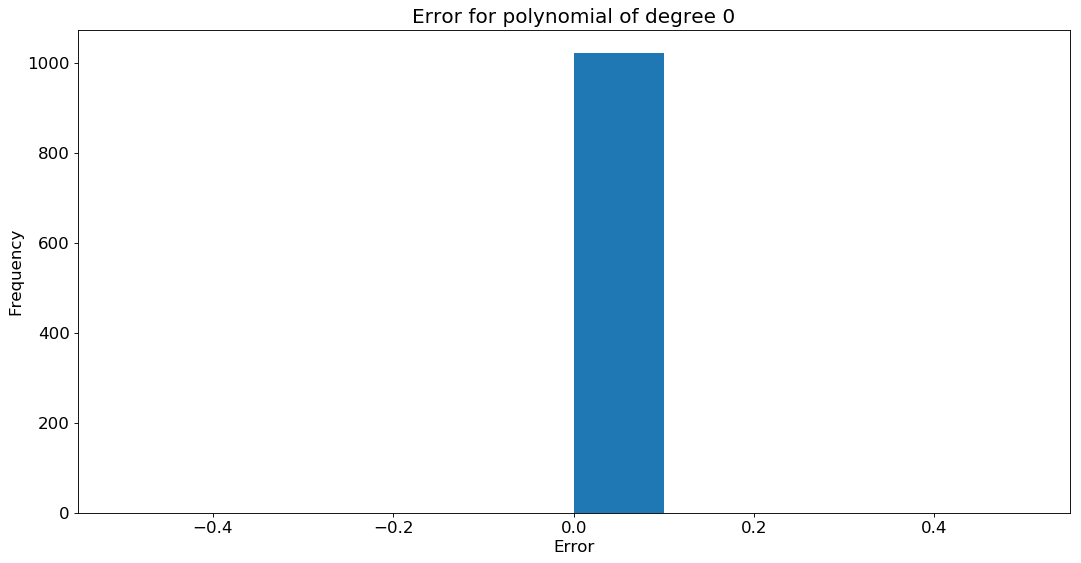

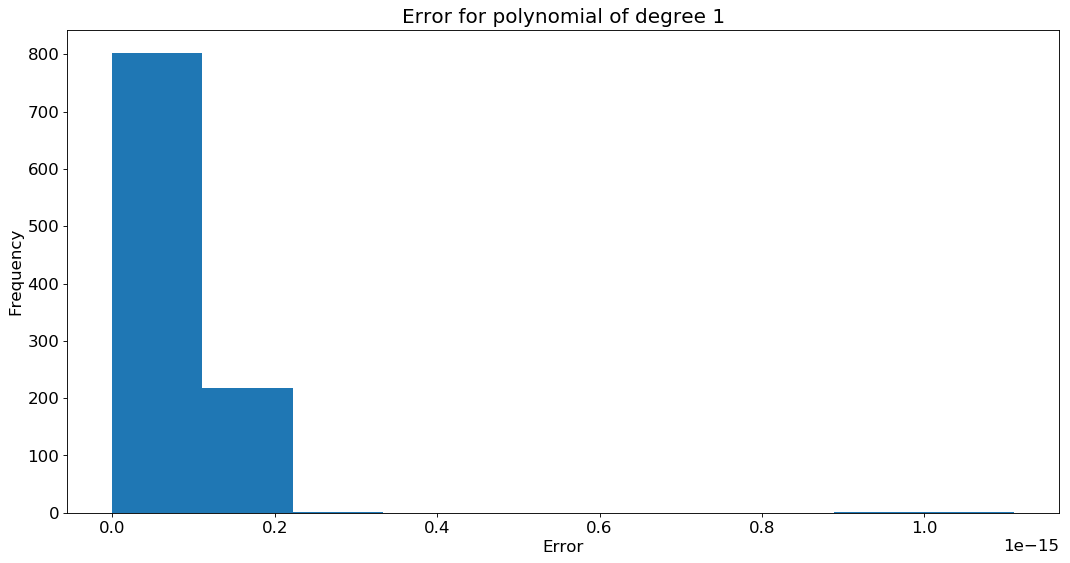

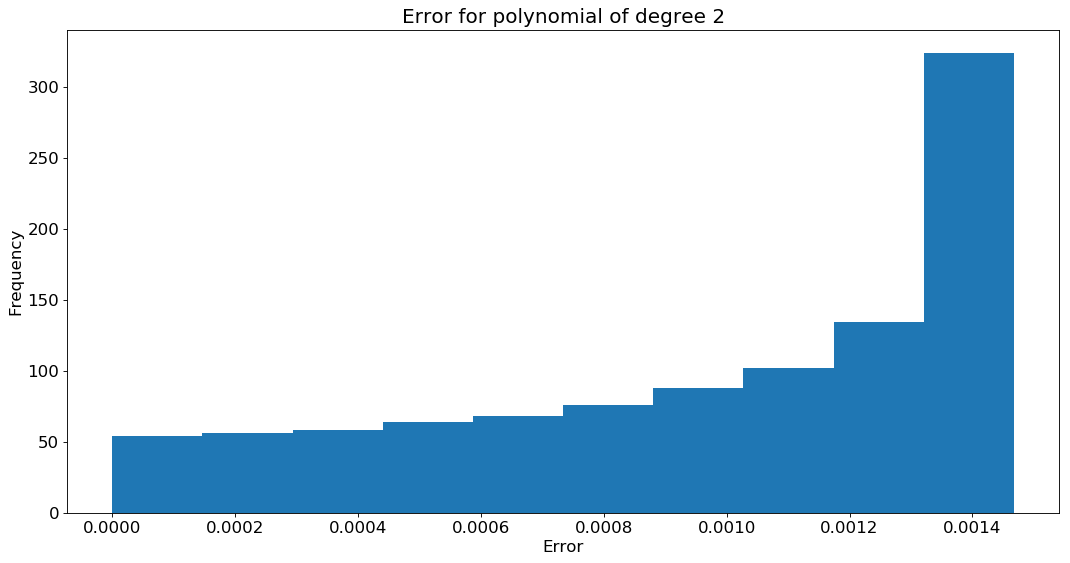

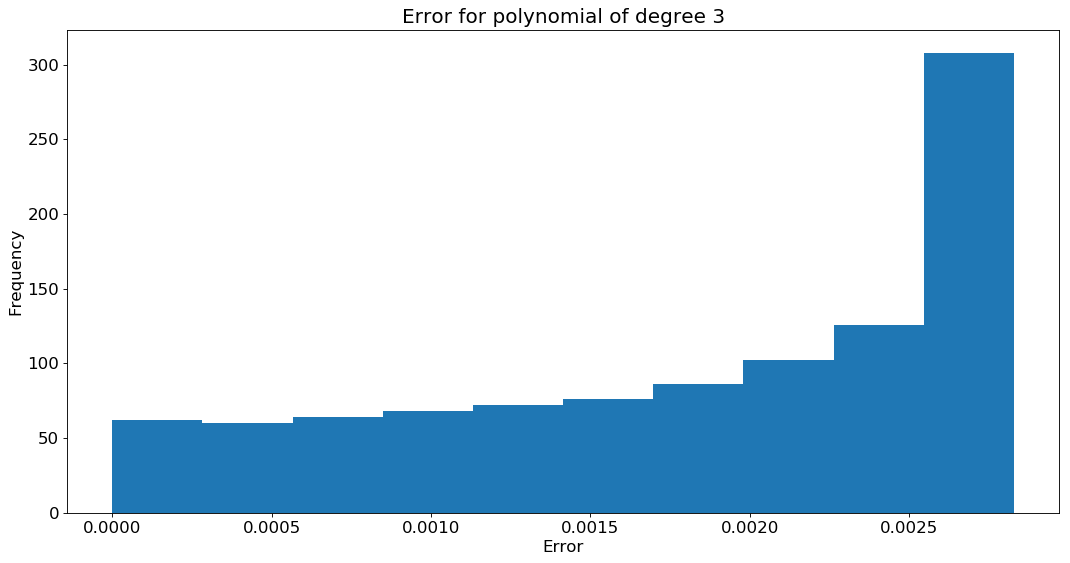


$\Delta x = 2^{-11}$


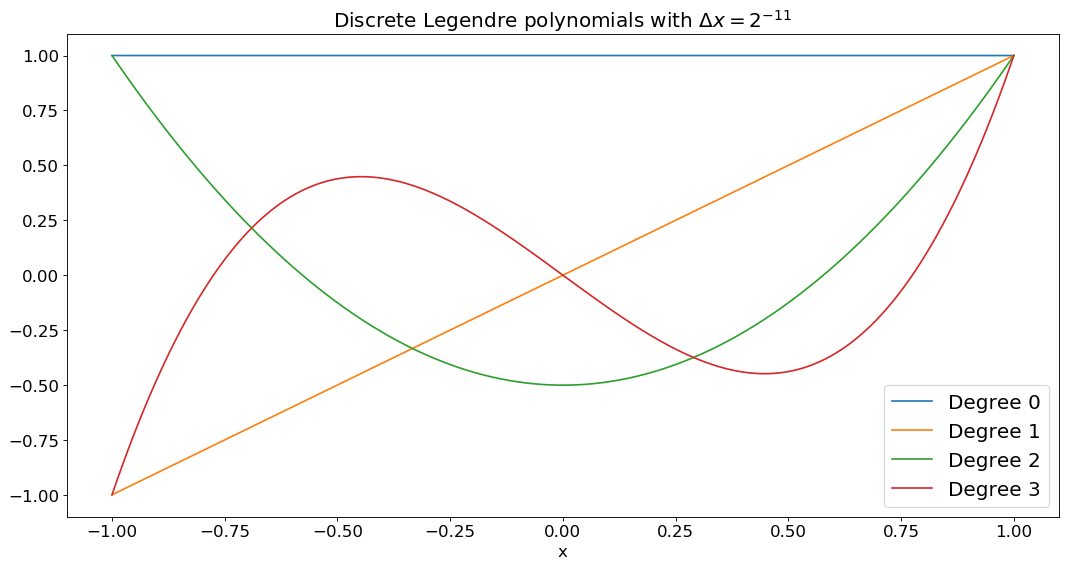

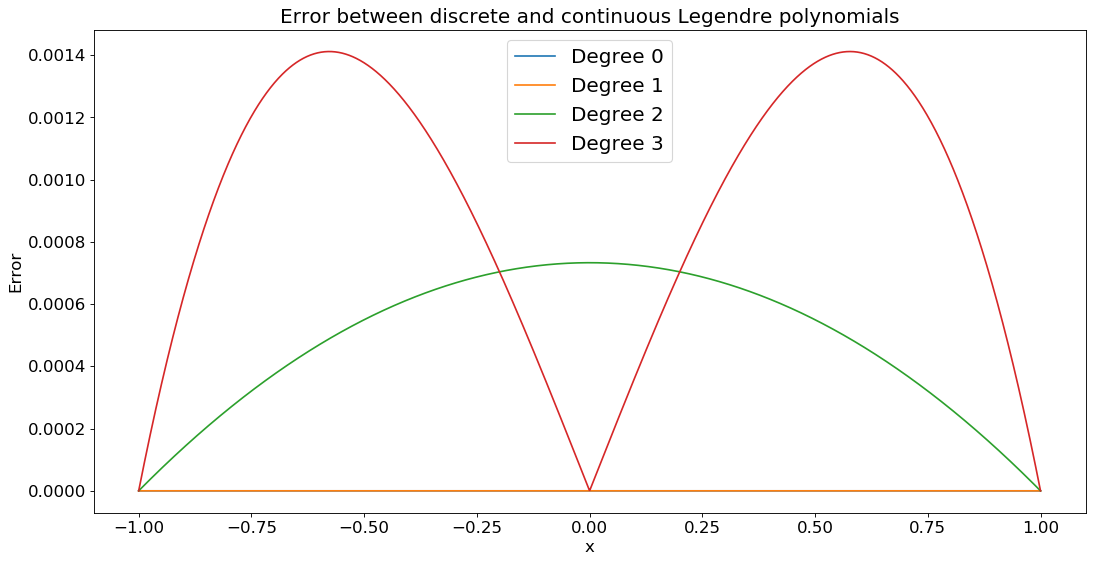

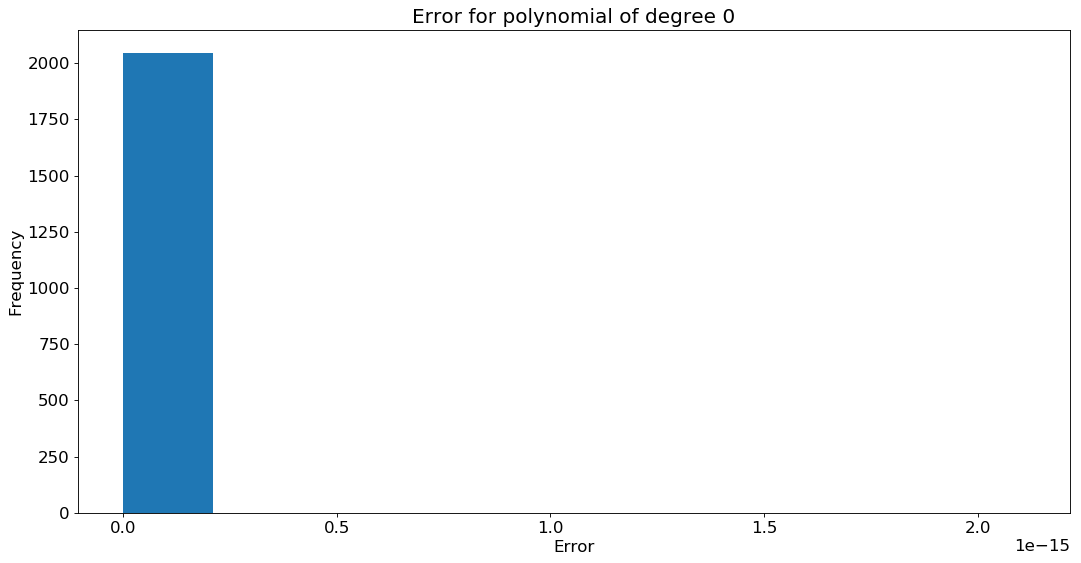

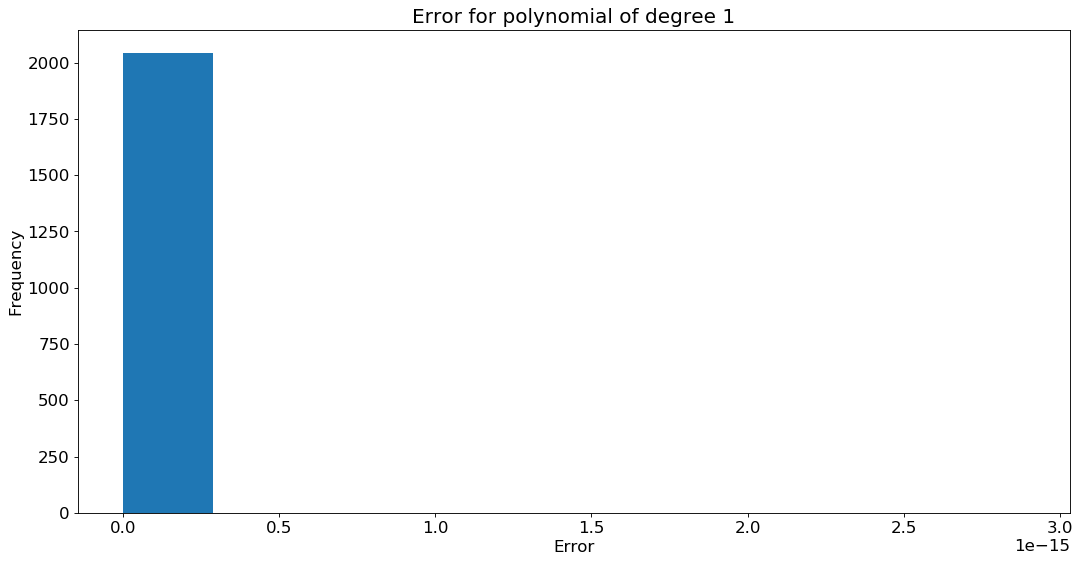

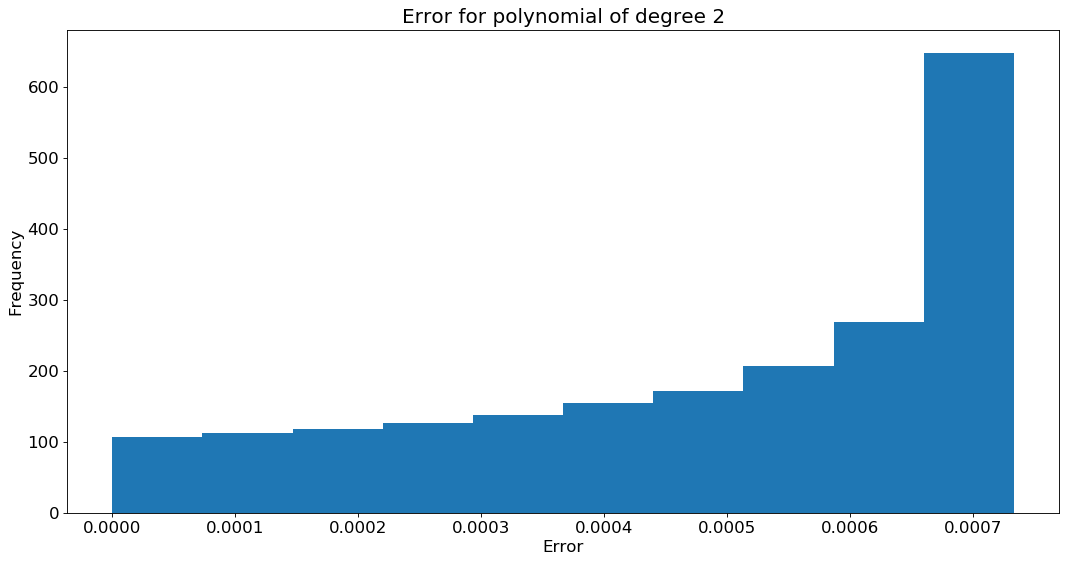

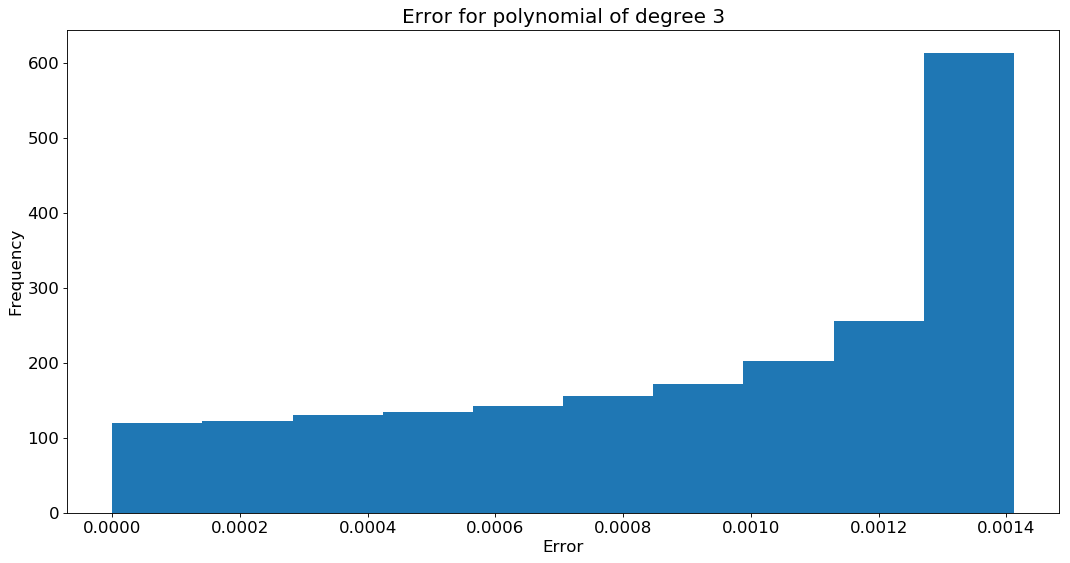


$\Delta x = 2^{-12}$


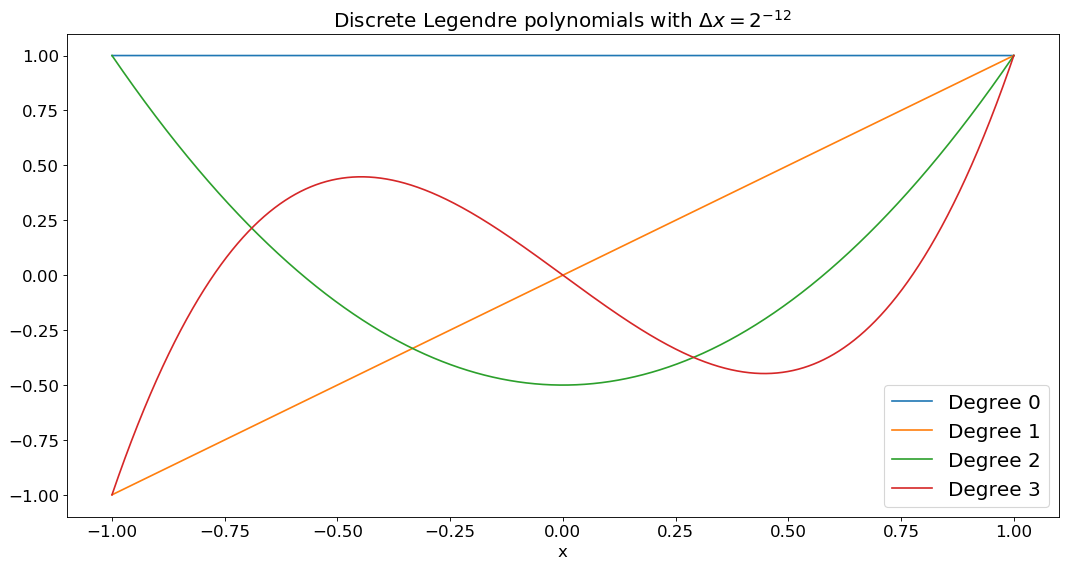

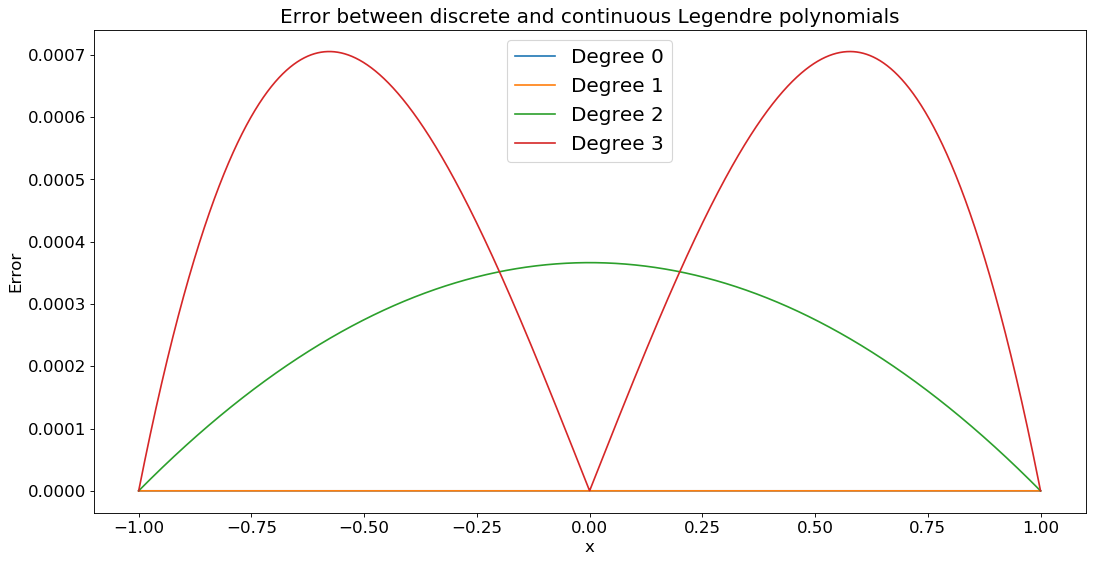

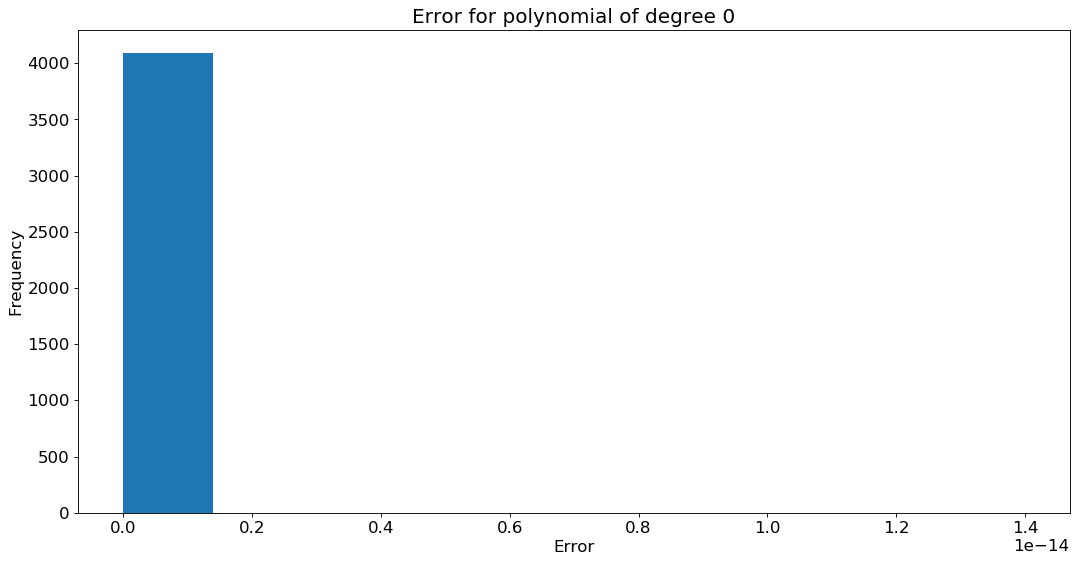

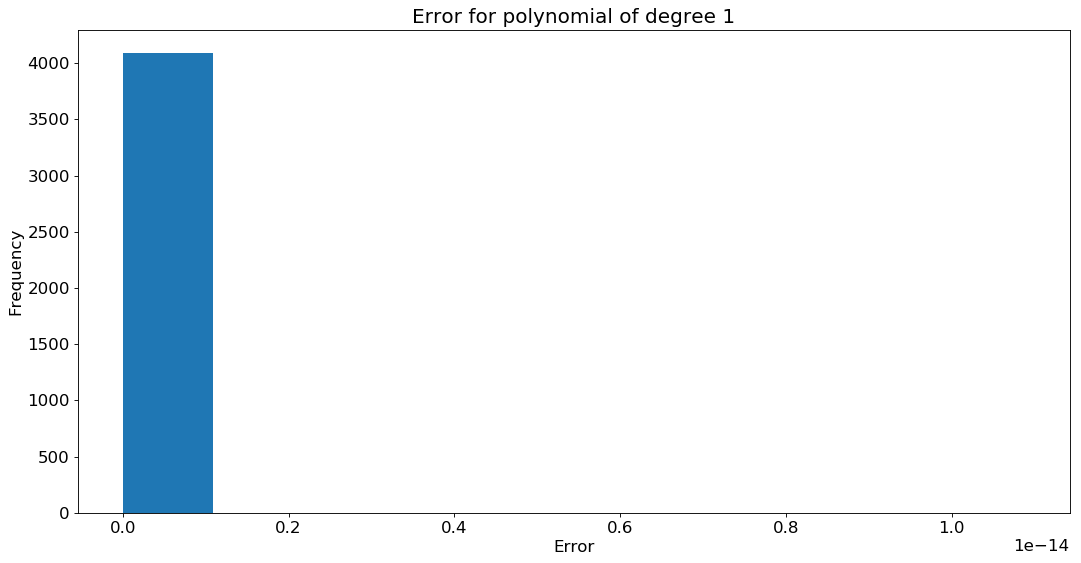

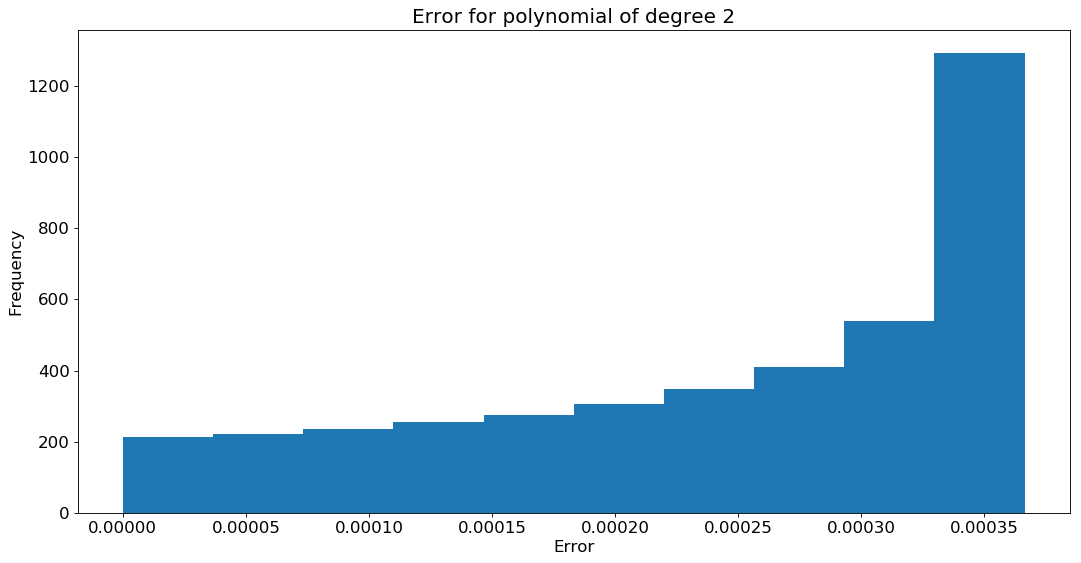

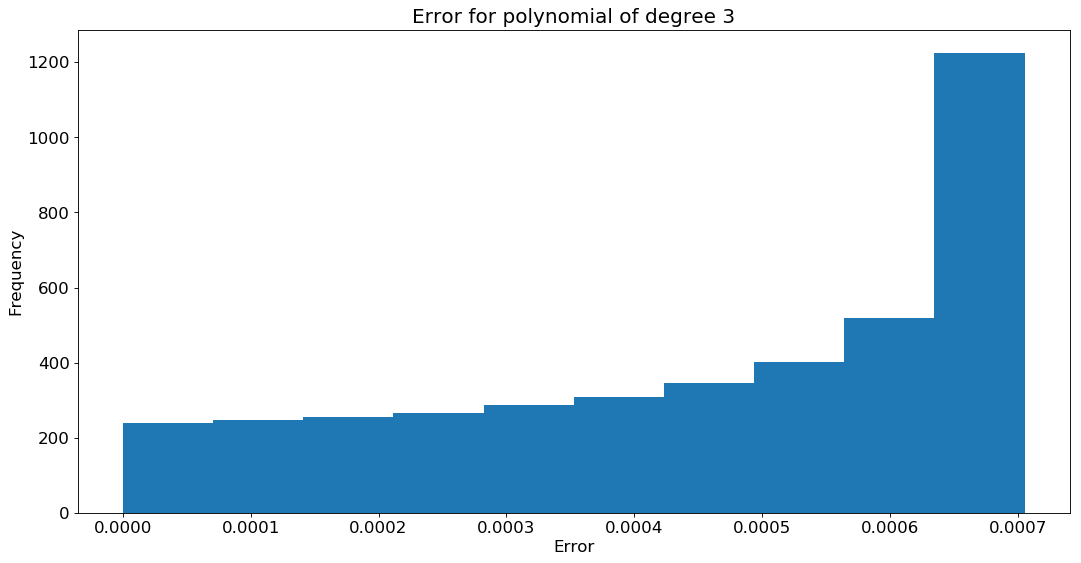


$\Delta x = 2^{-13}$


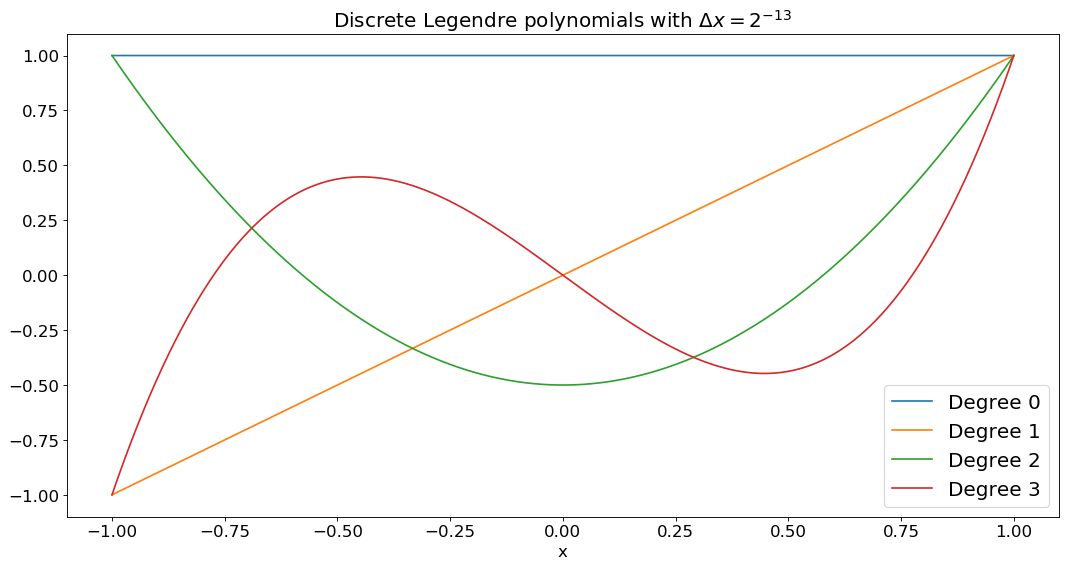

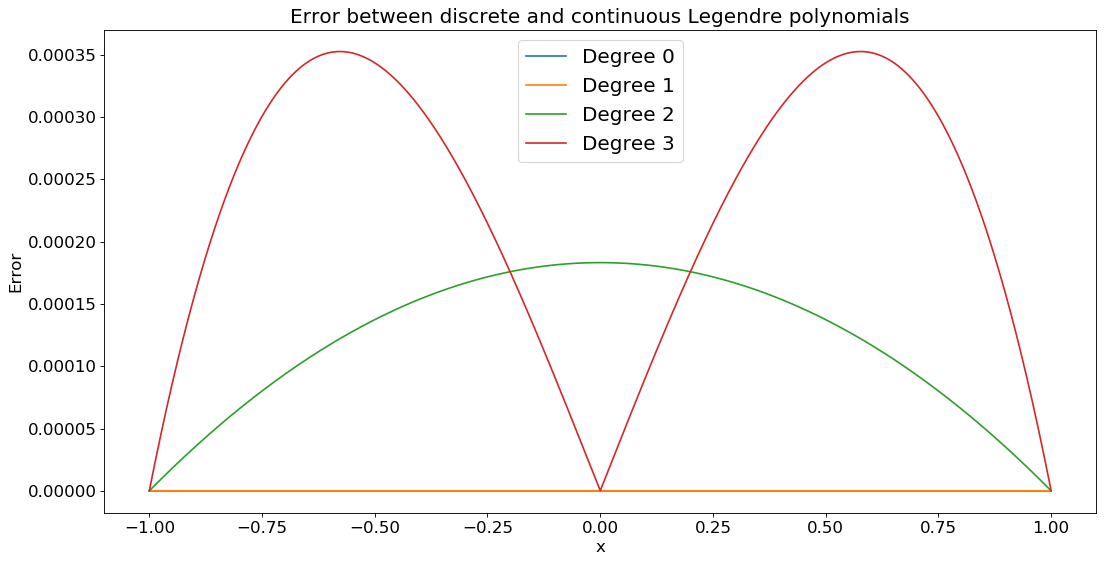

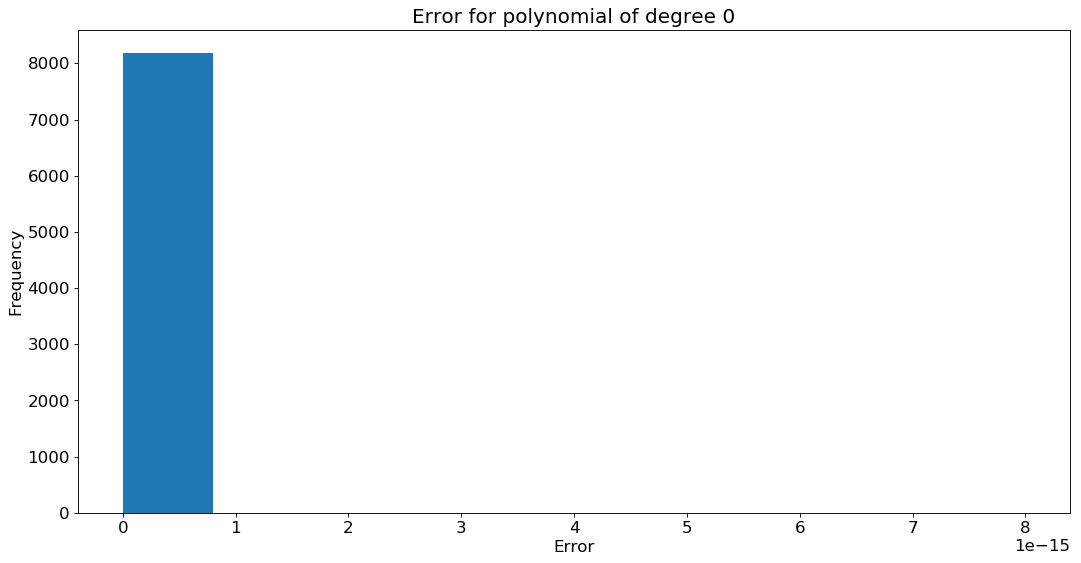

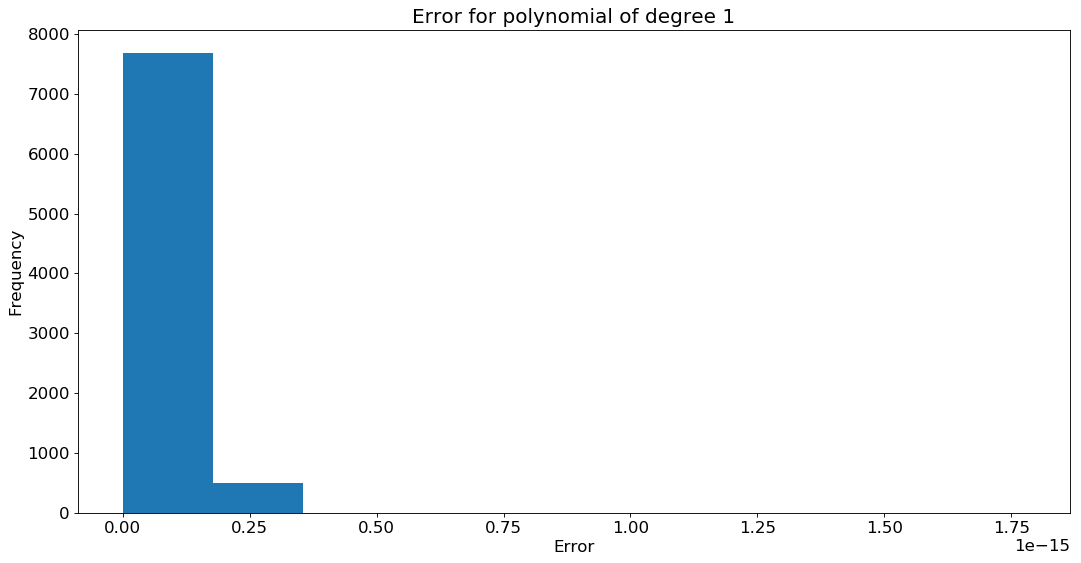

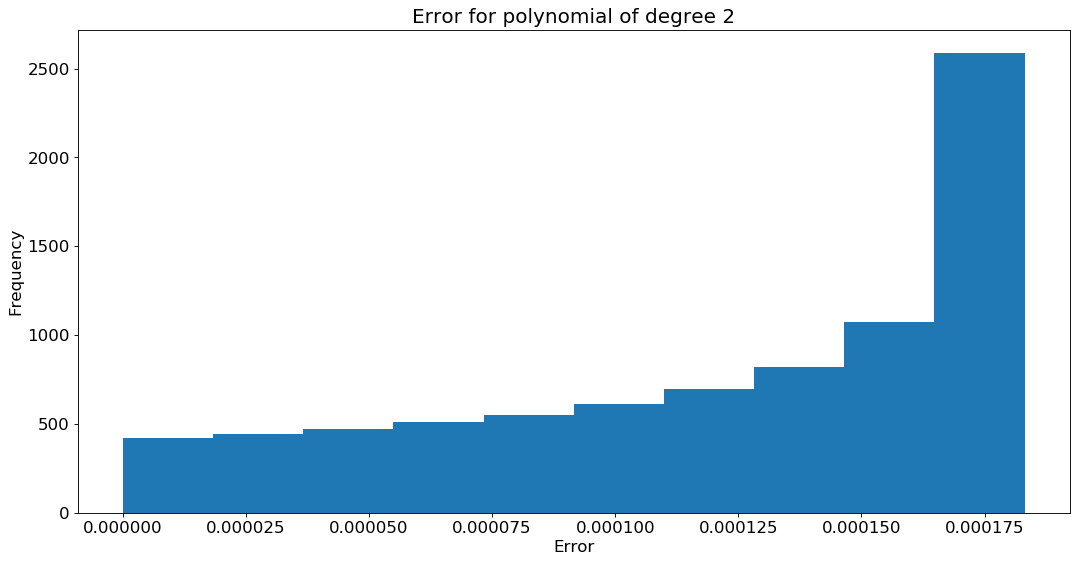

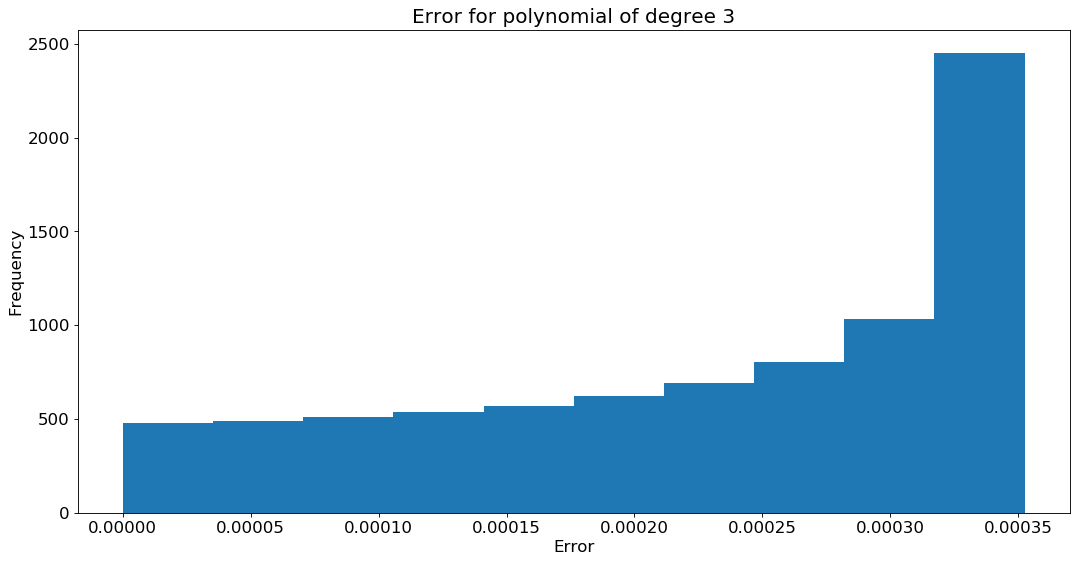

In [8]:
error_ticks = np.linspace(0,0.03,7)
for nu in [8,9,10,11,12,13]:
    print('\n$\Delta x = 2^{-%s}$'%(nu))
    Dx = 2**(nu)
    x = np.linspace(-1,1,Dx)
#    x = np.arange(-1,1,Dx)
    A = np.array([x**0 , x , x**2, x**3]).T
    Q,R = np.linalg.qr(A)

    scale = Q[-1,:]
    Q = Q@np.diag(1/scale)
    for kk in range(4):
        plt.plot(x,Q[:,kk],label='Degree %s'%(kk))
    plt.legend()
    plt.xlabel('x')
    plt.title('Discrete Legendre polynomials with $\Delta x = 2^{-%s}$'%(nu))
    plt.show()
    
    true_legendre = np.array([np.polyval(legendre(kk),x) for kk in range(4)]).T
    error = np.abs(Q-true_legendre)
    for kk in range(4):
        plt.plot(x,error[:,kk],label='Degree %s'%(kk))
    plt.legend()
    plt.title('Error between discrete and continuous Legendre polynomials')
    plt.ylabel('Error')
#    plt.yticks(error_ticks)
    plt.xlabel('x')
    plt.show()

    for kk in range(4):
        plt.hist(error[:,kk],label='Degree %s'%(kk))
        plt.xlabel('Error')
        plt.ylabel('Frequency')
        plt.title('Error for polynomial of degree %s'%(kk))
        plt.show()